In [1]:
import numpy as np
np.seterr(divide='ignore', invalid='ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_csv('crop_production.csv')

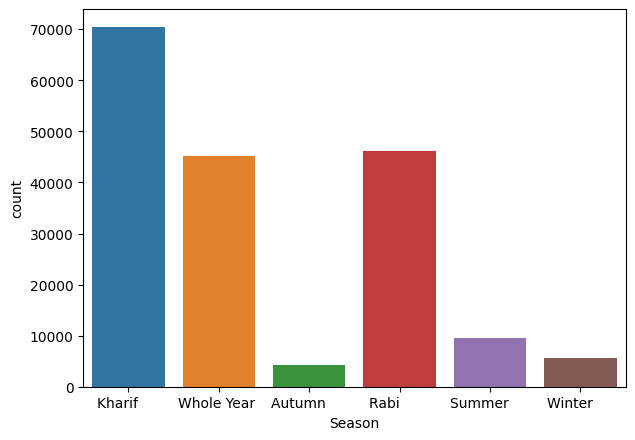

In [20]:
plt.figure(figsize=(7,5),dpi=100)
sns.countplot(data=df,x='Season');

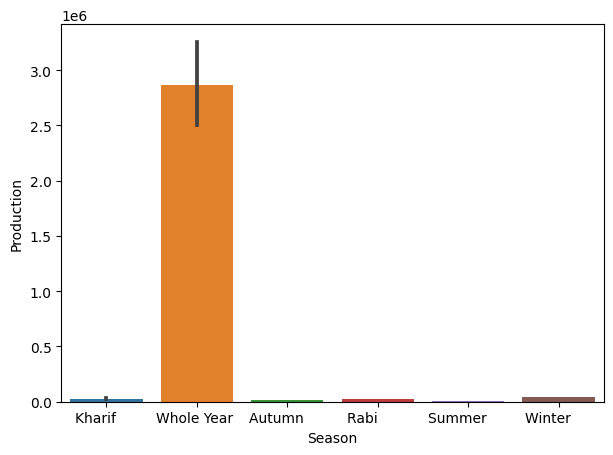

In [21]:
plt.figure(figsize=(7,5),dpi=100)
sns.barplot(data=df,x='Season',y='Production');

In [22]:
df['District_Name'].nunique()

518

In [23]:
state_prod = df.groupby('State_Name')['Production'].sum().reset_index().sort_values(by='Production',ascending=False)
px.bar(state_prod , 'State_Name', 'Production')

In [24]:
state_prod

,State_Name,Production
15,Kerala,97880045375.70
1,Andhra Pradesh,17324590296.00
27,Tamil Nadu,9350898130.90
3,Assam,2111751759.00
17,Maharashtra,1263640606.20
14,Karnataka,863429811.68
0,Andaman and Nicobar Islands,718223239.99
24,Punjab,586385001.00
9,Gujarat,524291337.00
8,Goa,505755757.58


In [25]:
df.groupby('State_Name').sum()['Production'].nlargest()

State_Name
Kerala           97880045375.70
Andhra Pradesh   17324590296.00
Tamil Nadu        9350898130.90
Assam             2111751759.00
Maharashtra       1263640606.20
Name: Production, dtype: float64

In [26]:
df.groupby("State_Name").sum()['Production'].nsmallest()

State_Name
Chandigarh                 63956.50
Mizoram                  1661539.83
Dadra and Nagar Haveli   1847871.00
Sikkim                   2435735.00
Manipur                  5230917.00
Name: Production, dtype: float64

In [27]:
df['Area'].shape

(181162,)

In [28]:
df.groupby(['State_Name','Crop_Year']).sum()['Production']

State_Name                   Crop_Year
Andaman and Nicobar Islands  2000          89060914.00
                             2001          89718700.00
                             2002          94387137.67
                             2003          95296454.67
                             2004          87186497.63
                                              ...     
Tamil Nadu                   2009          35860821.00
                             2010          26302861.00
                             2011        4877894939.00
                             2012          22544368.60
                             2013        3691185850.00
Name: Production, Length: 434, dtype: float64

In [29]:
dist_prod = df.groupby('District_Name')['Production'].sum().reset_index().sort_values(by='Production')
dist = dist_prod[0:5]
px.bar(dist , 'District_Name', 'Production')

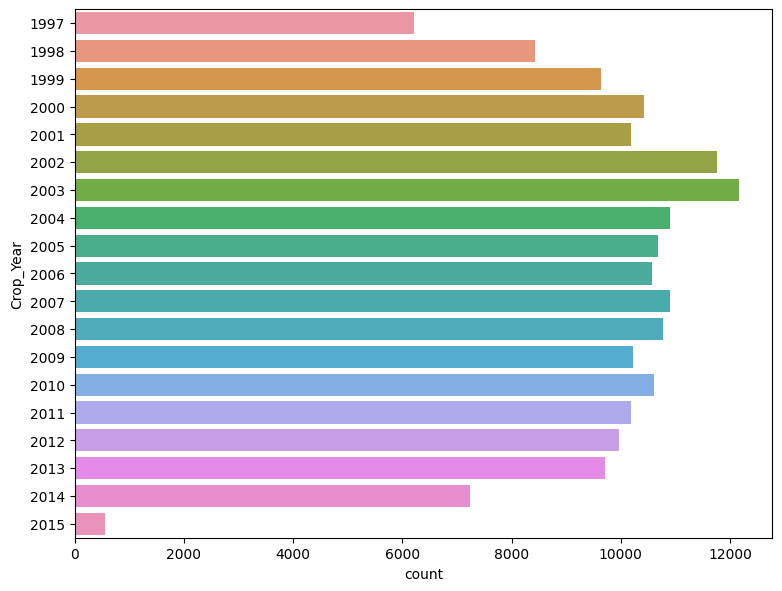

In [30]:
plt.figure(figsize=(9,7),dpi=100)
sns.countplot(data=df,y='Crop_Year');

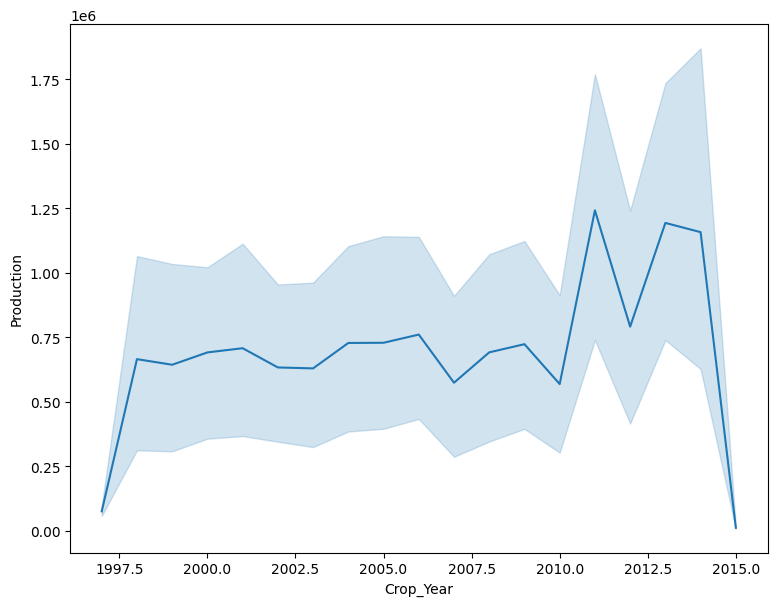

In [31]:
plt.figure(figsize=(9,7),dpi=100)
sns.lineplot(data=df,x='Crop_Year',y='Production');

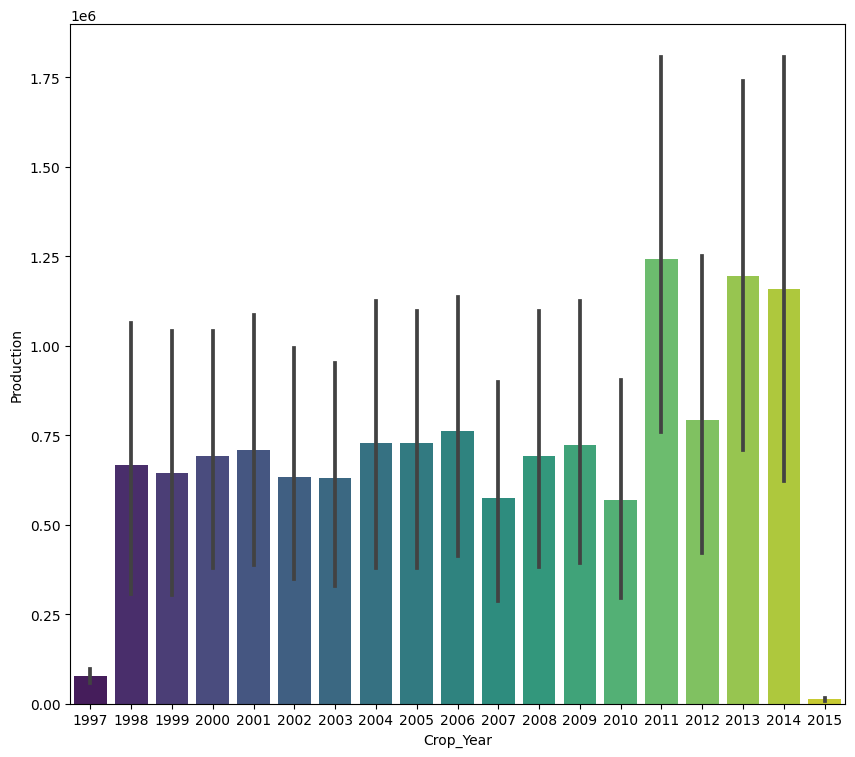

In [32]:
plt.figure(figsize=(10,9),dpi=100)
sns.barplot(data=df,x='Crop_Year',y='Production',palette='viridis');

In [33]:
df.groupby('Season').sum()['Production']

Season
Autumn            52390865.22
Kharif          1965357766.57
Rabi            1204644433.48
Summer            83924141.03
Whole Year    129781000225.49
Winter           251009163.17
Name: Production, dtype: float64

In [34]:
TamilNadu_data = df[df['State_Name'] == 'Tamil Nadu']
TamilNadu_data.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
177690,Tamil Nadu,ARIYALUR,2009,Kharif,Rice,25978.00,80462.00
177691,Tamil Nadu,ARIYALUR,2009,Kharif,Small millets,404.00,649.00
177692,Tamil Nadu,ARIYALUR,2009,Whole Year,Arhar/Tur,160.00,122.00
177693,Tamil Nadu,ARIYALUR,2009,Whole Year,Bajra,644.00,1082.00
177694,Tamil Nadu,ARIYALUR,2009,Whole Year,Banana,134.00,5761.00


In [35]:
top_prod_TN = TamilNadu_data.groupby('Crop').sum()["Production"].reset_index().sort_values(by='Production',ascending=False).nlargest(n=10,columns='Production')
top_prod_TN

,Crop,Production
12,Coconut,8562053999.00
47,Sugarcane,577108213.00
42,Rice,72547323.00
50,Tapioca,47315469.00
3,Banana,36369357.00
21,Groundnut,12082455.00
27,Maize,8196759.00
53,Total foodgrain,6908631.00
25,Jowar,4134986.00
31,Onion,3019240.00


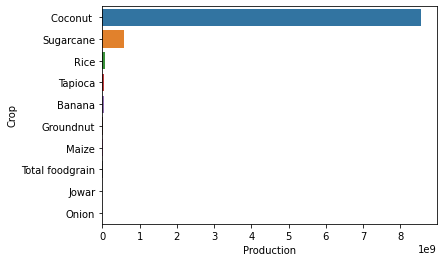

In [36]:
sns.barplot(data=top_prod_TN,y='Crop',x='Production')

In [37]:
TN_District = TamilNadu_data.groupby('District_Name').sum()['Production'].reset_index().sort_values(by='Production',ascending=False)
TN_District

,District_Name,Production
1,COIMBATORE,2511855215.39
18,THANJAVUR,1428293471.10
4,DINDIGUL,767374506.44
20,THENI,680870617.58
9,KRISHNAGIRI,589596196.91
7,KANNIYAKUMARI,457409302.10
5,ERODE,407817447.37
10,MADURAI,373674921.00
16,SALEM,302794676.63
14,PUDUKKOTTAI,276557694.00


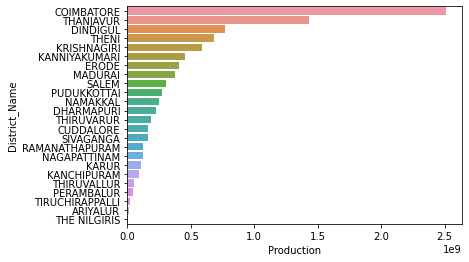

In [38]:
sns.barplot(data=TN_District,y='District_Name',x='Production')

In [39]:
df.groupby('Season').sum()['Production'].nlargest()

Season
Whole Year    129781000225.49
Kharif          1965357766.57
Rabi            1204644433.48
Winter           251009163.17
Summer            83924141.03
Name: Production, dtype: float64

In [40]:
df['Crop'].value_counts().reset_index()

,index,Crop
0,Rice,11742
1,Maize,9961
2,Moong(Green Gram),7028
3,Groundnut,6609
4,Sesamum,6537
...,...,...
99,Ricebean (nagadal),10
100,Jobster,9
101,Perilla,9
102,Coffee,6


In [41]:
coconut_crop = df[df['Crop'] == 'Coconut ']

In [42]:
coconut_crop

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
5,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Coconut,18168.00,65100000.00
14,Andaman and Nicobar Islands,NICOBARS,2001,Whole Year,Coconut,18190.00,64430000.00
23,Andaman and Nicobar Islands,NICOBARS,2002,Whole Year,Coconut,18240.00,67490000.00
32,Andaman and Nicobar Islands,NICOBARS,2003,Whole Year,Coconut,18284.74,68580000.00
41,Andaman and Nicobar Islands,NICOBARS,2004,Whole Year,Coconut,18394.70,52380000.00
...,...,...,...,...,...,...,...
187497,Tamil Nadu,THIRUVARUR,2009,Whole Year,Coconut,5314.00,76900.00
187521,Tamil Nadu,THIRUVARUR,2011,Whole Year,Coconut,4916.00,106300000.00
187548,Tamil Nadu,THIRUVARUR,2013,Whole Year,Coconut,4787.00,68500000.00
187707,Tamil Nadu,TIRUCHIRAPPALLI,2002,Whole Year,Coconut,5991.00,84200.00


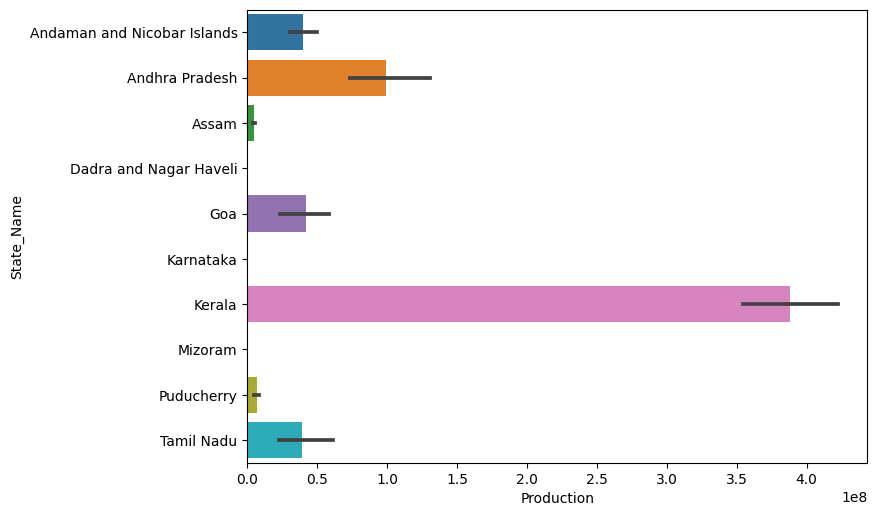

In [43]:
plt.figure(figsize=(8,6),dpi=100)
sns.barplot(data=coconut_crop,x='Production',y='State_Name');

In [44]:
coconut_districts = coconut_crop.groupby('District_Name').sum()['Production'].nlargest().reset_index()
px.bar(data_frame=coconut_districts,x='District_Name',y='Production')


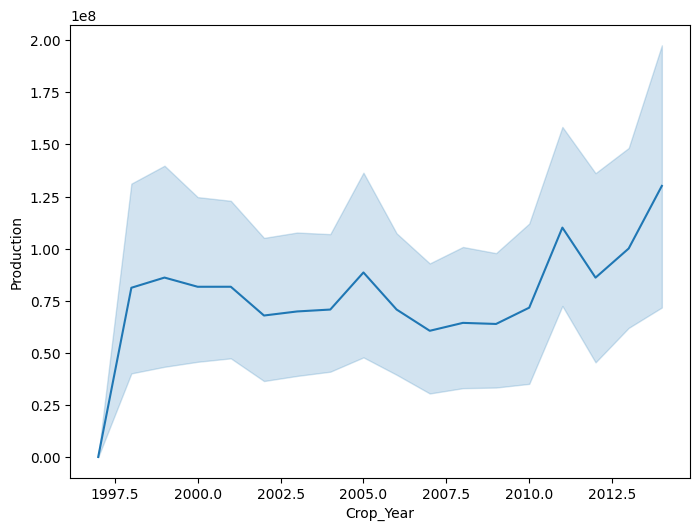

In [45]:
plt.figure(figsize=(8,6),dpi=100)
sns.lineplot(data=coconut_crop,x='Crop_Year',y='Production');

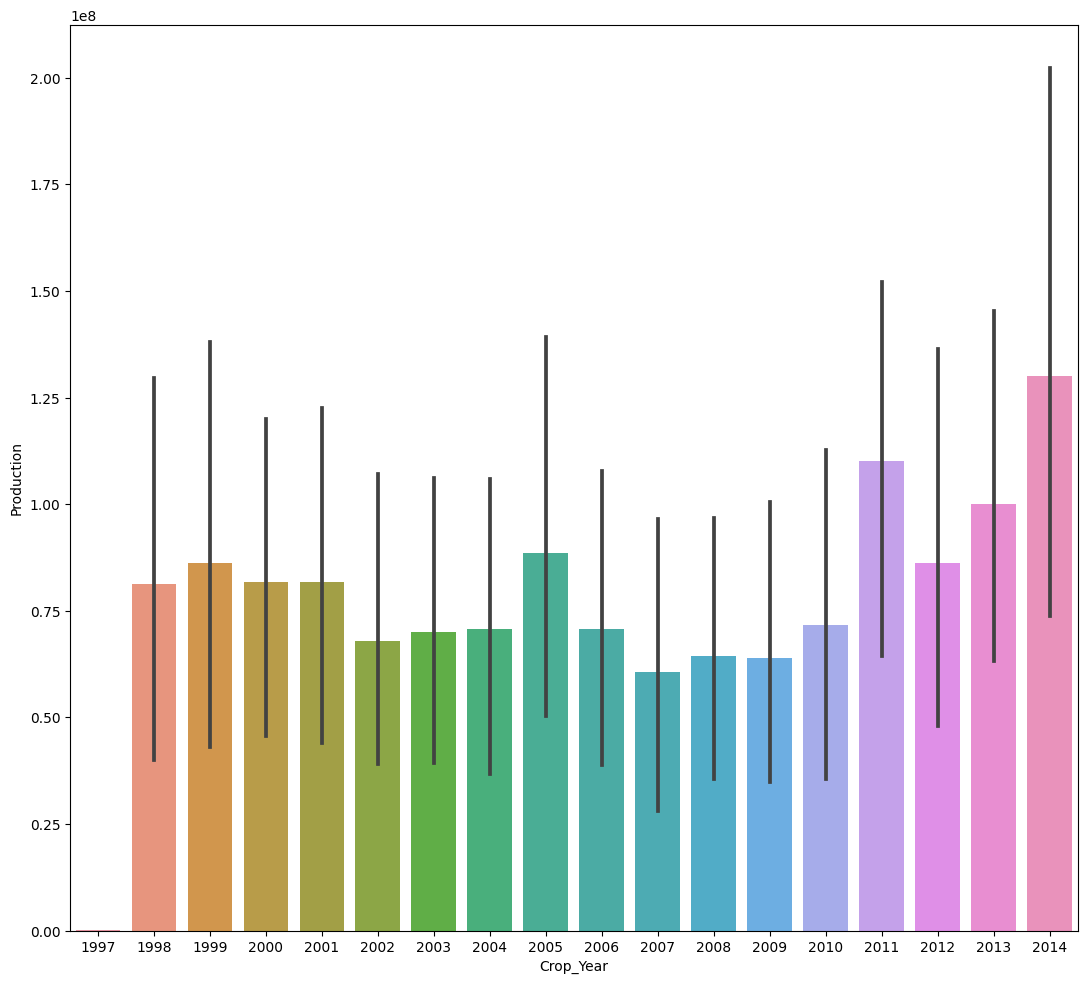

In [46]:
plt.figure(figsize=(13,12),dpi=100)
sns.barplot(data=coconut_crop,x='Crop_Year',y='Production');

In [47]:
coconut_crop.groupby('Season').sum()['Production'].nlargest()

Season
Whole Year    126782309024.29
Kharif              117328.00
Name: Production, dtype: float64

In [48]:
coconut_season = coconut_crop.groupby('Season').sum()['Production'].reset_index()
px.bar(data_frame=coconut_season,x='Season',y='Production')


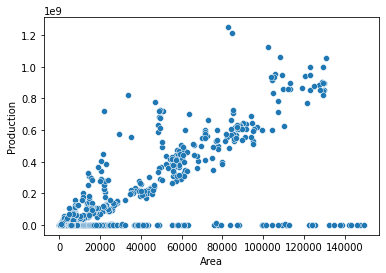

In [49]:

sns.scatterplot(data=coconut_crop,x='Area',y='Production');